In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import shap
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('...')

X = df.drop(columns=['RDFT'])
Y = df['RDFT']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print(X.columns)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

Index(['1BalabanJ', '1BertzCT', '1Chi0', '1Chi0n', '1Chi0v', '1Chi1', '1Chi1n',
       '1Chi1v', '1Chi2n', '1Chi2v',
       ...
       '4fr_ester', '4fr_ether', '4fr_halogen', '4fr_ketone',
       '4fr_ketone_Topliss', '4fr_unbrch_alkane', 'Temp-set/℃', 'Droplet/μL',
       'Temp-env/℃', 'RH/%'],
      dtype='object', length=445)


In [3]:
rf_regressor =RandomForestRegressor(n_estimators=400,
                                      max_depth=100,
                                      min_samples_split=3,
                                      min_samples_leaf=1,
                                      bootstrap=True,
                                      random_state=1)
model = rf_regressor


rf_regressor.fit(X_train_stand, y_train)
y_train_hat = rf_regressor.predict(X_train_stand)
y_test_hat = rf_regressor.predict(X_test_stand)

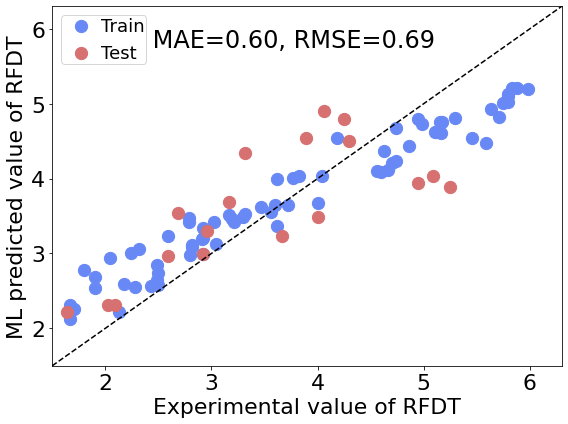

In [4]:
fontsize = 22
plt.figure(figsize=(8, 6))

a = plt.scatter(y_train, y_train_hat, s=150, c=[(104/255, 136/255, 245/255)], label='Train')
b = plt.scatter(y_test, y_test_hat, s=150, c=[(215/255, 112/255, 113/255)], label='Test')
plt.plot([1.5, 6.3], [1.5, 6.3], color='k', linestyle='--')
plt.xlabel('Experimental value of RFDT', fontsize=fontsize)
plt.ylabel('ML predicted value of RFDT', fontsize=fontsize)


r2 = r2_score(y_test, y_test_hat)
mae = mean_absolute_error(y_test, y_test_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

plt.text(2.37, 5.75, f' MAE={mae:.2f}, RMSE={rmse:.2f}', fontsize=24)

plt.xlim([1.5, 6.3])
plt.ylim([1.5, 6.3])

plt.legend(fontsize=18, handletextpad=0.1, borderpad=0.1)
plt.tick_params(axis='both', which='major', labelsize=fontsize)

plt.tight_layout()

plt.show()